### 파이"썬을 이용한 웹 데이터 수집(크롤링)과정
1. 문서 내용 읽어오기 : urllib 패키지- urlopen()접속- read() 데이터 읽어오기
    - text 속성을 사용해서 데이터를 읽어 올 수도 있음
    
2. 문서에서 원하는 내용추출하기(파싱)



    - BeautifulSoup 패키지 사용- find/findAll() 함수 사용-select도 사용가능

####  urllib 패키지-url 을 넘겨주면 데이터를 텍스트 형태로 반환(기본 내장 패키지)

- urllib2, urllib3 다른 버전 사용


In [13]:
## 파이썬에서 HTTP 요청을 보내주는 모듈 : requests(기본 내장 모듈)
import requests


In [14]:
url="http://www.tistory.com"
response = requests.get(url)  #서버측으로 요청 신호를 보냄(get 방식으로 요청)
response.status_code # 서버에게 요청해 받은 응답결과 코드(응답 성공:200 응답오류:400번대-클라이언트오류 500번대 코드:서버오류)  )
response.text


'\n\t<!doctype html>\n\t<html lang="ko">\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t<meta property="og:url" content="https://www.tistory.com">\n\t\t<meta property="og:site_name" content="TISTORY">\n\t\t<meta property="og:title" content="TISTORY">\n\t\t<meta property="og:description" content="나를 표현하는 블로그를 만들어보세요.">\n\t\t<meta property="og:image" content="//t1.daumcdn.net/tistory_admin/static/images/openGraph/opengraph.png">\n\t\t<title>TISTORY</title>\n\t\t<link rel="shortcut icon" href="//t1.daumcdn.net/tistory_admin/static/top/favicon.ico">\n\t\t<link rel="apple-touch-icon" href="//t1.daumcdn.net/tistory_admin/static/images/openGraph/180x180.png">\n\t\t<link rel="apple-touch-icon" sizes="76x76" href="//t1.daumcdn.net/tistory_admin/static/images/openGraph/76x76.png">\n\t\t<link rel="apple-touch-icon" sizes="120x120" href="//t1.daumcdn.net/tistory_admin/static/images/openGraph/120x120.png">\n\t\t<link rel="apple-touch-icon" sizes="152x152" href="//t1.daumcdn.net/tistory_admin/static/ima

In [15]:
r=requests.get("http://www.google.co.kr")
print(r)
print(len(r.text))
print((r.text))

<Response [200]>
13239
<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="sVpn5fJKmjE5kjaNMOnazw==">(function(){window.google={kEI:'29sJYfKxBoavoASIj4S4Dw',kEXPI:'0,772215,1,530320,56873,954,5105,206,4804,925,1391,383,246,5,304,1050,5251,6384,1116131,1197705,578,92,328892,51223,16115,6057,22627,17572,4859,1361,9291,3029,2814,14765,4020,978,13227,3848,4192,6430,14527,235,4282,2778,919,5081,1593,1279,2212,239,291,149,1103,840,2196,4101,3514,606,2023,2297,14670,3227,2845,7,12354,5096,7877,5036,2854,553,908,2,940,2615,13142,3,346,230,6460,148,13970,4,1533,2304,1236,5803,4684,2012,4069,9544,4764,2658,4243,2458,655,31,13628,2305,638,7080,10535,665,5815,2542,4094,19,3119,6,908,3,3541,1,14710,1814,283,38,874,5994,2463,10061,2,1394,2806,1718,2,3054,6166,4799,1339,59

In [16]:
# 네이버 사이트에 requests 모듈을 이용해 접속하고 응답코드를 출력해 보세요

In [17]:
url="https://www.naver.com/"
response = requests.get(url)  
response.status_code 

200

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
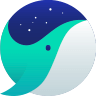
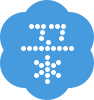

In [18]:
response.text

In [19]:
res = requests.get("https://www.naver.com/")  
print("status_code ", res.status_code)

status_code  200


#### 파라미터
- 파라미터란? ; 사이트의 문서를 요청할 때 서버로 전달되는 정보
- 함수의 파라미터 처럼 문서를 찾기 위한 정보나 문서 구성을 하기 위한 정보를 전달하게 되는데 그 정보를 파라미터라고 함
- https://sports.news.naver.com/news?oid=477&aid=0000312064
- params={"param1":"value1","param2":"value2"}
- res=requests.get(url,params=params)

In [20]:
url="https://sports.news.naver.com/news"
params={"oid":477,"aid":"0000312064"}
res=requests.get(url,params=params)
print("status_code ", res.status_code)

status_code  200


In [21]:
url1="https://sports.news.naver.com/news"
res1=requests.get(url1,params=params)
print("status_code ", res1.status_code)



status_code  200


#### urllib 패키지 이용한 서버 요청
- urllib 서브 패키지 request 의 urlopen() 모듈을 이용

In [22]:
from urllib.request import urlopen

b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
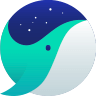
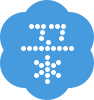

In [23]:
url = "http://www.naver.com"
res = urlopen(url)
print(res)
print(res.read())

#### 문서에서 원하는 내용 추출하기(파싱)
- html문서에서 원하는 내용 추출

     -beautifulsoup 라이브러리 사용
        -아나콘다(주피터)는 기본 포함되어 잇는 패키지
        -파이참은 설치해서 사용해야함
            -flie/settings
            -projent interpreter에서 bs4 검색
            -[install pachge] 버튼을 클릭
            
        - pip install bs4(터미널에서 실행)
     - find()/findAll() 함수 사용

In [24]:
import bs4 # 아나콘다는 설치되어 있음
from bs4 import BeautifulSoup


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
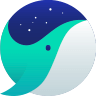
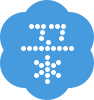

In [25]:
url = "http://www.naver.com"
res = urlopen(url)
bs_obj = bs4.BeautifulSoup(res,'html.parser') # 반환 결과가 html 형태로 반환
print(bs_obj)


<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title">
   <meta content="index,nofollow" name="robots">
    <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description">
     <meta content="네이버" property="og:title"/>
     <meta content="https://www.naver.com/" property="og:url"/>
     <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
     <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description">
      <meta content="summary" name="twitter:card"/>
      <meta content="" name="twitter:title"/>
      <meta content="https://www.naver.com/" name="twitter:url"/>
      <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/
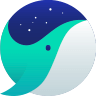
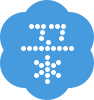

In [26]:
print(bs_obj.prettify()) # 들여쓰기를 해서 계측정인 구조로 출력 / 가독성이 높다

In [27]:
print(type(bs_obj))

<class 'bs4.BeautifulSoup'>


#### bs4 메서드인 find()/findAll() 함수에 대해서 정리

- find() : 선택자에 의해서 찾은 요소 중 첫번째 요소를 반환
- findAll()/find_all() : 선택자에 의해서 찾은 모든 요소를 리스트로 반환

In [28]:
html_str = """
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>
"""

In [29]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")
print(type(bs_obj))

<class 'bs4.BeautifulSoup'>


In [30]:

ul = bs_obj.find("ul")
print(ul)
print(type(ul))

<ul>
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>
<class 'bs4.element.Tag'>


In [31]:
lis = ul.findAll('li')
lis

[<li>hello</li>, <li>bye</li>, <li>welcome</li>]

In [32]:
type(lis)
lis[0].text

'hello'

In [33]:
for li in lis : 
    print(li.text)

hello
bye
welcome


#### class 속성을 사용해서 선택

In [34]:
html_str = """
<html>
    <body>
        <ul class="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
    </body>
</html>
"""

In [35]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")
print(type(bs_obj))

<class 'bs4.BeautifulSoup'>


In [36]:
ul = bs_obj.find("ul",{"class":"reply"})
# bs_obj.find(class='reply')# 에러 발생
ul

<ul class="reply">
<li>ok</li>
<li>no</li>
<li>sure</li>
</ul>

In [37]:
lis = ul.findAll("li")
for li in lis :
    print(li.text)

ok
no
sure


In [38]:
uls = bs_obj.find_all("ul")
uls

[<ul class="greet">
 <li>hello</li>
 <li>bye</li>
 <li>welcome</li>
 </ul>,
 <ul class="reply">
 <li>ok</li>
 <li>no</li>
 <li>sure</li>
 </ul>]

In [39]:
html_str = """
<html>
    <body>
        <h1 id='title'>Hello Python</h1>
        <p id="crawling">웹 크롤링</p>
        <p id="parsing">파싱</p>
    </body>
</html>"""

In [40]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")

In [41]:
bs_obj.find("p",{"id":'parsing'}).text # 태그를 선택하고 속성 매칭 진행

'파싱'

In [42]:
print(bs_obj.find(id='title')) # id 속성 자체를 매칭
bs_obj.find(id='title').text

<h1 id="title">Hello Python</h1>


'Hello Python'

In [43]:
html_str = """
<html>
    <body>
        <h1>파이썬 프로그래밍</h1>
        <p>웹 페이지 분석</p><p>크롤링</p><p>파싱</p>        
    </body>
</html>
"""

In [44]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")

In [45]:
p1 = bs_obj.find("p")
p1

<p>웹 페이지 분석</p>

In [46]:
print(p1.next_sibling)
p1.next_sibling.next_sibling # . 이용해서 체인 형식으로 연결 할 수 있다

<p>크롤링</p>


<p>파싱</p>

#### 속성 값 추출하기 (a 태그의 href 속성 추출)

In [47]:
html_str = """
<html>
    <body>
        <ul class="ko">
            <li><a href="https://www.naver.com/">네이버</a></li>
            <li><a href="https://www.daum.net/">다음</a></li>
        </ul>
        <ul class="sns">
            <li><a href="https://www.goole.com/">구글</a></li>
            <li><a href="https://www.facebook.net/">페이스북</a></li>
        </ul>
    </body>
</html>
"""

In [48]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")

In [49]:
a_t = bs_obj.find("a")
a_t

<a href="https://www.naver.com/">네이버</a>

In [50]:
print(a_t['href'])
print(a_t.text)

https://www.naver.com/
네이버


In [51]:
# 모든 a 태그의 href 주소 얻어오기
a_ts =bs_obj.findAll("a")
a_ts

[<a href="https://www.naver.com/">네이버</a>,
 <a href="https://www.daum.net/">다음</a>,
 <a href="https://www.goole.com/">구글</a>,
 <a href="https://www.facebook.net/">페이스북</a>]

In [52]:
lis = []
for a_t in a_ts :
    print(a_t['href'])
    lis.append(a_t['href'])
lis

https://www.naver.com/
https://www.daum.net/
https://www.goole.com/
https://www.facebook.net/


['https://www.naver.com/',
 'https://www.daum.net/',
 'https://www.goole.com/',
 'https://www.facebook.net/']

In [53]:
html_str = """
<html>
   <body>
    	<div id="wrap">
        	<div id="mainMenuBox">                	
                <ul>  
                    <li><a href="#">패션잡화</a></li>    
                    <li><a href="#">주방용품</a></li>                     	          
                    <li><a href="#">생활건강</a></li>
                    <li><a href="#">DIY가구</a></li>
                </ul>
            </div>
        	<div>
            	<table>
                	<tr><td><img src="shoes1.jpg"></td>
                    	  <td><img src="shoes2.jpg"></td>
                    	  <td><img src="shoes3.jpg"></td></tr>
                    <tr id="prdName"><td>솔로이스트<br>걸리쉬 리본단화</td>
                    	  <td>맥컬린<br>그레이가보시스트랩 펌프스</td>
                          <td>맥컬린<br>섹슈얼인사이드펌프스</td></tr>
                    <tr id="price"><td>100,000원</td><td>200,000원</td><td>120,000원</td></tr>
                </table>
            </div>
            <div>
            	<div class="box">
                	<h4>공지사항</h4>
                    <hr>
                    <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br>
                    <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br>
                    <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>                               
                </div>
                <div class="box">
                	<h4>커뮤니티</h4>
                    <hr>
                    <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br>
                    <a href="#">[가구] : 헌집 새집 베스트 가구</a><br>
                    <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br>
                 </div>
            </div>            
        </div>
    </body>
</html>"""

In [54]:
bs_obj = bs4.BeautifulSoup(html_str,"html.parser")

In [55]:
## selector : select() 함수를 사용할 수 있음
for i in bs_obj.select('a[href]') :
    print(i.text)


패션잡화
주방용품
생활건강
DIY가구
[배송] : 무표배송 변경 안내 18.10.20
[전시] : DIY 가구 전시 안내 18.10.31
[판매] : 11월 특가 상품 안내 18.11.05
[레시피] : 살 안찌는 야식 만들기
[가구] : 헌집 새집 베스트 가구
[후기] : 배송이 잘못 됐어요 ㅠㅠ


In [56]:
bs_obj.select('div #mainMenuBox ul') # 리스트 형태로 반환

[<ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href="#">주방용품</a></li>
 <li><a href="#">생활건강</a></li>
 <li><a href="#">DIY가구</a></li>
 </ul>]

In [57]:
bs_obj.select("#wrap > div") # id wrap 태그의 모든 자식 div

[<div id="mainMenuBox">
 <ul>
 <li><a href="#">패션잡화</a></li>
 <li><a href="#">주방용품</a></li>
 <li><a href="#">생활건강</a></li>
 <li><a href="#">DIY가구</a></li>
 </ul>
 </div>,
 <div>
 <table>
 <tr><td><img src="shoes1.jpg"/></td>
 <td><img src="shoes2.jpg"/></td>
 <td><img src="shoes3.jpg"/></td></tr>
 <tr id="prdName"><td>솔로이스트<br/>걸리쉬 리본단화</td>
 <td>맥컬린<br/>그레이가보시스트랩 펌프스</td>
 <td>맥컬린<br/>섹슈얼인사이드펌프스</td></tr>
 <tr id="price"><td>100,000원</td><td>200,000원</td><td>120,000원</td></tr>
 </table>
 </div>,
 <div>
 <div class="box">
 <h4>공지사항</h4>
 <hr/>
 <a href="#">[배송] : 무표배송 변경 안내 18.10.20</a><br/>
 <a href="#">[전시] : DIY 가구 전시 안내 18.10.31</a><br/>
 <a href="#">[판매] : 11월 특가 상품 안내 18.11.05</a>
 </div>
 <div class="box">
 <h4>커뮤니티</h4>
 <hr/>
 <a href="#">[레시피] : 살 안찌는 야식 만들기</a><br/>
 <a href="#">[가구] : 헌집 새집 베스트 가구</a><br/>
 <a href="#">[후기] : 배송이 잘못 됐어요 ㅠㅠ</a><br/>
 </div>
 </div>]

In [58]:
# nth-child() 태그 선택자와 사용해야함

# bs_obj.select('.box:nth-child(2) a[href]')

In [60]:
bs_obj.select(".box")[1].select("a[href]")[0]

<a href="#">[레시피] : 살 안찌는 야식 만들기</a>